# Base model 

In [11]:
# import the necessary libraries you need for your analysis
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

RSEED = 42

In [ ]:
df = pd.read_csv('data/2_data.csv')

# Base model with H1 und H2

In [ ]:
sns.scatterplot(data=df, x='goal_orig',y='state')

In [ ]:
# Defining target and predictors 
X = df[['goal_orig','category_id']] #predictors
y = df['state'] #target

In [ ]:
# Train-test-split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED)

In [12]:
# Scaling with MinMaxScaler

# Try to scale you data with the MinMaxScaler() from sklearn. 
# It follows the same syntax as the StandardScaler.
# Don't forget: you have to import the scaler at the top of your notebook. 

# Scaling with MinMaxScaler
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [13]:
# Modelling
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)
y_pred = logistic_regression.predict(X_test_scaled)

In [14]:
cr = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

      failed       0.59      0.70      0.64     18491
  successful       0.73      0.63      0.67     23754

    accuracy                           0.66     42245
   macro avg       0.66      0.66      0.66     42245
weighted avg       0.67      0.66      0.66     42245

[[12994  5497]
 [ 8898 14856]]


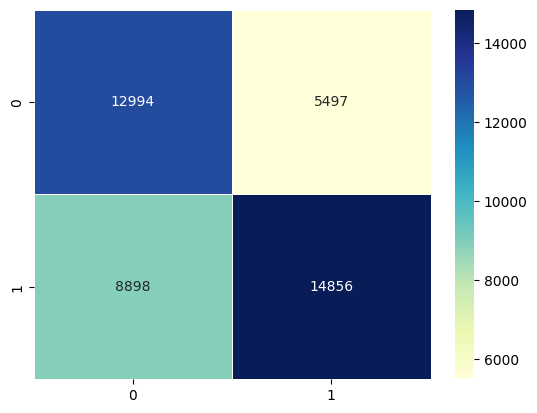

In [15]:
# Confusion matrix using confusion_matrix from sklearn
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

Conclusion: model is shit